# Perform Feature Extraction and visualize the data by reducing the dimensions using PCA
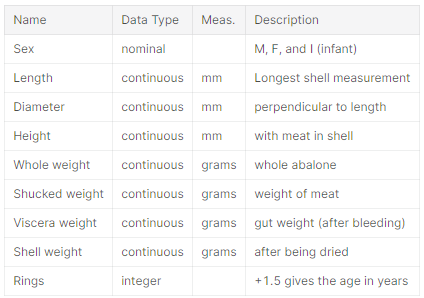

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Python\\ML\\Datasets\\abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df['Age'] = df['Rings'] + 1.5


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [7]:
x = df.drop(columns = ['Rings','Age']).values
y = df['Age']
print(x.shape)
print(y.shape)

(4177, 8)
(4177,)


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtest = sc.fit_transform(xtest)
print(sc_xtrain.shape)
print(sc_xtest.shape)
print(ytrain.shape)

(3341, 8)
(836, 8)
(3341,)


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_model = PolynomialFeatures(degree=4)
poly_xtrain = poly_model.fit_transform(xtrain)
poly_xtest = poly_model.fit_transform(xtest)
# from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_xtrain,ytrain)
ypred = model.predict(poly_xtest)

# print(f'PCA Model Score: {model.score(xtrain,ytrain)}')
print(f'Before PCA Model Score: {model.score(poly_xtrain,ytrain)}')

Before PCA Model Score: 0.7071901977721531


In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(sc_xtrain)
a =pca.transform(sc_xtrain)
val = pca.explained_variance_ratio_.cumsum()*100
val
# a # print transform values

array([ 79.1008555 ,  91.60425118,  95.38897356,  97.5048895 ,
        98.93975068,  99.75207523,  99.91418211, 100.        ])

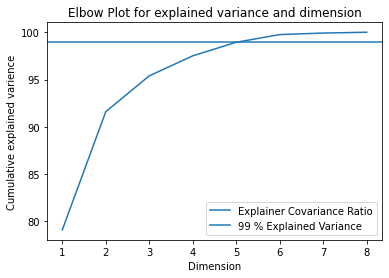

In [13]:
plt.plot(range(1,len(val) + 1),val,label = 'Explainer Covariance Ratio')
plt.axhline(y = 99,label = '99 % Explained Variance')
plt.title('Elbow Plot for explained variance and dimension')
plt.xlabel('Dimension')
plt.ylabel('Cumulative explained varience')
plt.legend()

In [14]:
# For Training Data

pca = PCA(n_components=0.99)
pca.fit(sc_xtrain)
pca_xtrain = pca.transform(sc_xtrain)
# pca.n_components_
print("Selected Components: ",pca.n_components_)
print(pca_xtrain.shape)


Selected Components:  6
(3341, 6)


In [15]:
# For Testing  Data
pca = PCA(n_components=0.99)
pca.fit(sc_xtrain)
pca_xtest = pca.transform(sc_xtest)
# pca.n_components_
print("Selected Components: ",pca.n_components_)
print(pca_xtest.shape)


Selected Components:  6
(836, 6)


0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64


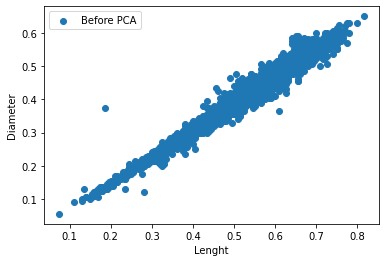

In [17]:
print(df['Length'])
plt.scatter(df['Length'],df['Diameter'],label = "Before PCA")
plt.xlabel('Lenght')
plt.ylabel('Diameter')
plt.legend()


[2.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]


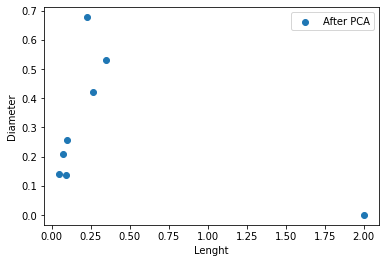

In [16]:
print(x[1])
plt.scatter(x[1],x[2],label = 'After PCA')
plt.xlabel('Lenght')
plt.ylabel('Diameter')
plt.legend()


# Using Polynimial Regression Score is

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=4)
poly_xtrain = poly_model.fit_transform(pca_xtrain)
poly_xtest = poly_model.fit_transform(pca_xtest)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_xtrain,ytrain)
ypred = model.predict(poly_xtest)

# print(f'PCA Model Score: {model.score(xtrain,ytrain)}')
print(f'PCA Model Score of Training Data: {model.score(poly_xtrain,ytrain)}')
# print(f'PCA Model Score of Testing: {model.score(poly_xtest,ytest)}')

PCA Model Score of Training Data: 0.6265960353202921
